### Support Vector Machine (SVM)
SVM is a classification algorithm, where the different classes are seperated by drawing a boundry line, which is placed at an optimum distance between different categries. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#import warnings
#warnings.filterwarnings("ignore")

#### Read data
In this demo, we are going to work on default dataset, where the species of the iris flowers are identified based on different parameters.

In [2]:
#reading input from csv file
iris_data = pd.read_csv("datasets/iris.csv")
iris_data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Feature Engineering
We will create a new column in the dataframe, that distinguishes the species - 'versicolor' from rest.
In turn, we will create a binary classifier based on this.

In [3]:
v_nv = lambda x: 0 if x=="versicolor" else 1 
iris_data["v_nv"] = iris_data["Species"].apply(v_nv)

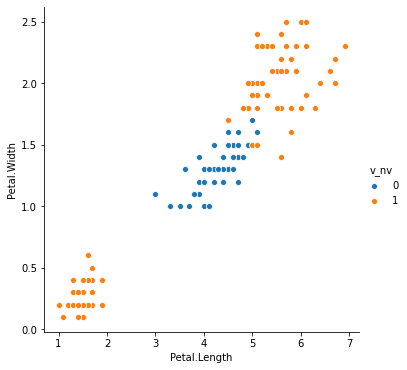

In [4]:
#visualization using seaborn - pairplot
import seaborn as sns
sns.pairplot(iris_data,
             x_vars = "Petal.Length",y_vars="Petal.Width",
             hue="v_nv",height=5)

 To view the decision regions of the classifier we are using mlxtend.
 To install the mlxtend package on conda you can use the below command.
 conda install mlxtend --channel conda-forge
 You can also use pip install mlxtend if you are not installing into conda env.

In [5]:
X = iris_data[["Petal.Length","Petal.Width"]]
Y = iris_data["v_nv"]

In [6]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
 5   v_nv          150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### Building a SVM model

In [7]:
#Support Vector Classification
from sklearn.svm import SVC

model = SVC(kernel="rbf")#rbf kernel used for non-linear classification
model.fit(X,Y)
model.score(X,Y)

0.9533333333333334

#### Visualing the model

Text(0.5, 1.0, 'Decision boundary of SVM RBF kernel on iris data')

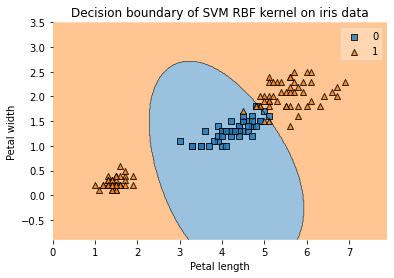

In [8]:
from mlxtend.plotting import plot_decision_regions
features = np.array(X)
target = np.array(Y).ravel()
plot_decision_regions(features,target,clf=model)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title('Decision boundary of SVM RBF kernel on iris data')

### SVM model on iris data for multi class classification

In [9]:
iris_data.loc[iris_data.Species=="setosa","Species"] = 0
iris_data.loc[iris_data.Species=="versicolor","Species"] = 1
iris_data.loc[iris_data.Species=="virginica","Species"] = 2
iris_data.Species = iris_data.Species.astype("category")#dtype of the column will be 'category'
                                                    #https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html
iris_data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,v_nv
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


#### Building multiclass classifier

In [10]:
X = iris_data[["Petal.Length","Petal.Width"]]
Y = iris_data["Species"]
model = SVC(kernel="rbf")
model.fit(X,Y)

SVC()

In [11]:
pred=model.predict(X)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [12]:
model.score(X,Y)

0.9533333333333334

#### Visualizing multiclass classifier

Text(0.5, 1.0, 'Multiclass classification on iris using SVM')

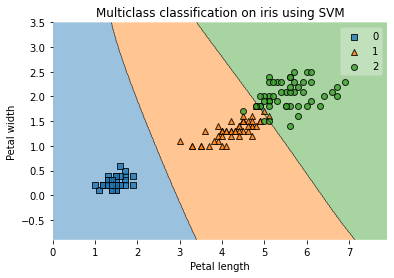

In [13]:
features = np.array(X)
target = np.array(Y).ravel()
plot_decision_regions(features,target,clf=model)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title('Multiclass classification on iris using SVM')